In [8]:
# Be sure to first have pyspedas installed first through: pip install pyspedas or update with pip install --upgrade & pip install pyspedas --upgrade
# Other packages may include: pip install pandas --upgrade & pip install statsmodels --upgrade
# Run the omnisave file first and ensure the SuperMAG data files are downloaded

# This is just to load the data and other possible parameters that can be added to the plot
import csv
import pandas
import pyspedas
from pyspedas import time_double
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import time

# Download the .csv file from SuperMAG at https://supermag.jhuapl.edu/substorms/ (an account is required, just make it anonymous), rename it to "substormdata.csv"
# Also download the SME data file from SuperMAG at https://supermag.jhuapl.edu/indices/ and rename it to "smedata.csv"
# Use the following for Linux/Mac:
datadirectory=os.path.expanduser('~')+'/Downloads/Data/' # The ending forward slash is necessary
# Use the following for Windows:
#datadirectory=os.path.join(os.path.join(os.environ['USERPROFILE']),'Downloads\\') # The two ending back slashes are necessary

# It may be necessary to use a conversion factor on some of these parameters, example:
tempconversionfactor=8.61732814974493*1e-5 # for K to eV in temperature

substormfile=datadirectory+'substormdata.csv'
with open(substormfile,'r') as csv_file:
    csv_reader=csv.reader(csv_file)
substormdata=pandas.read_csv(substormfile)
substormtime=substormdata.iloc[0:len(substormdata),0]
subtrange=time_double(substormtime)

supermagfile=datadirectory+'smedata.csv'
with open(supermagfile,'r') as csv_file:
    csv_reader=csv.reader(csv_file)
supermagdata=pandas.read_csv(supermagfile)
smetimes=supermagdata.iloc[0:len(supermagdata),0]
smevalues=supermagdata.iloc[1:len(supermagdata),1]

# Requires the use of omnisave.ipynb first
# For more info on these parameters, visit https://cdaweb.gsfc.nasa.gov/misc/NotesO.html#OMNI_HRO2_1MIN
loadedarrays=np.load(datadirectory+'myomnidata.npz')
bxtimes=loadedarrays['arr_0']
imfvalues=loadedarrays['arr_1']
plsvalues=loadedarrays['arr_2']
imfptsvalues=loadedarrays['arr_3']
plsptsvalues=loadedarrays['arr_4']
percinterpvalues=loadedarrays['arr_5']
timeshiftvalues=loadedarrays['arr_6']
rmstimeshiftvalues=loadedarrays['arr_7']
rmsphasevalues=loadedarrays['arr_8']
timebtwnobsvalues=loadedarrays['arr_9']
bmagvalues=loadedarrays['arr_10']
bxvalues=loadedarrays['arr_11']
byvalues=loadedarrays['arr_12']
bzvalues=loadedarrays['arr_13']
bygsmvalues=loadedarrays['arr_14']
bzgsmvalues=loadedarrays['arr_15']
rmssdbvalues=loadedarrays['arr_16']
rmssdfldvecvalues=loadedarrays['arr_17']
speedvalues=loadedarrays['arr_18']
vxvalues=loadedarrays['arr_19']
vyvalues=loadedarrays['arr_20']
vzvalues=loadedarrays['arr_21']
protondenvalues=loadedarrays['arr_22']
temperaturevalues=loadedarrays['arr_23']*tempconversionfactor
alpharatiovalues=loadedarrays['arr_24']
flowpressurevalues=loadedarrays['arr_25']
efieldmeasuredvalues=loadedarrays['arr_26']
betavalues=loadedarrays['arr_27']
alfmachvalues=loadedarrays['arr_28']
magmachvalues=loadedarrays['arr_29']
xposvalues=loadedarrays['arr_30']
yposvalues=loadedarrays['arr_31']
zposvalues=loadedarrays['arr_32']
bowshockxvalues=loadedarrays['arr_33']
bowshockyvalues=loadedarrays['arr_34']
bowshockzvalues=loadedarrays['arr_35']
aeindexvalues=loadedarrays['arr_36']
alindexvalues=loadedarrays['arr_37']
auindexvalues=loadedarrays['arr_38']
symdvalues=loadedarrays['arr_39']
symhvalues=loadedarrays['arr_40']
asydvalues=loadedarrays['arr_41']
asyhvalues=loadedarrays['arr_42']

# Add any derived parameters, take note of units
efieldxgsecalculatedvalues=1e3*1e3*1e-9*(vzvalues*byvalues-vyvalues*bzvalues) # values are in mV/m
efieldygsecalculatedvalues=1e3*1e3*1e-9*(vxvalues*bzvalues-vzvalues*bxvalues) # values are in mV/m
efieldzgsecalculatedvalues=1e3*1e3*1e-9*(vyvalues*bxvalues-vxvalues*byvalues) # values are in mV/m
efieldcalculatedvalues=np.sqrt(efieldxgsecalculatedvalues**2+efieldygsecalculatedvalues**2+efieldzgsecalculatedvalues**2) # values are in mV/m
magpressurevalues=1e9*(bmagvalues*1e-9)**2/(2*1.256637062*1e-6) # values are in nPa
alfvenspeedvalues=1e-3*1e-9*bmagvalues/np.sqrt(1.256637062*1e-6*1e6*protondenvalues*1.672621923*1e-27*(1+alpharatiovalues)) # values are in km/s
entropyvalues=temperaturevalues*(protondenvalues)**(-2/3) # values are in eV*cm^2
imfconeanglevalues=np.arccos(bxvalues/bmagvalues)*180/np.pi # converted to degrees written in python as \N{DEGREE SIGN}
# The following below is an attempt to make the clock angle useable, unfortunately it still jumps from 0 to 360, and I don't know what to do about that
#for i in range(len(bygsmvalues)):
#    if bygsmvalues[i]>=0 and bzgsmvalues[i]>=0:
#        imfclockanglevalues[i]=np.arctan(np.abs(bygsmvalues[i]/bzgsmvalues[i]))*180/np.pi # converted to degrees written in python as \N{DEGREE SIGN}
#    if bygsmvalues[i]>=0 and bzgsmvalues[i]<0:
#        imfclockanglevalues[i]=np.arctan(np.abs(bzgsmvalues[i]/bygsmvalues[i]))*180/np.pi+90
#    if bygsmvalues[i]<0 and bzgsmvalues[i]<0:
#        imfclockanglevalues[i]=np.arctan(np.abs(bygsmvalues[i]/bzgsmvalues[i]))*180/np.pi+180
#    if bygsmvalues[i]<0 and bzgsmvalues[i]>=0:
#        imfclockanglevalues[i]=np.arctan(np.abs(bzgsmvalues[i]/bygsmvalues[i]))*180/np.pi+270
#    if bygsmvalues[i]==np.nan:
#        imfclockanglevalues[i]=np.nan
#    if bzgsmvalues[i]==np.nan:
#        imfclockanglevalues[i]=np.nan
poyntingvalues=1e3*(1/(1.256637062*1e-6))*1e3*1e-18*speedvalues*bmagvalues**2 # values are in mW/m^2
epsilonvalues=1e-3*1e-9*poyntingvalues*4*np.pi*(7*6.3781*1e6)**2*np.sin(np.arctan(bygsmvalues/bzgsmvalues)/2)**4 # values are in GW

25-Apr-24 17:58:30: /tmp/ipykernel_15116/1018265815.py:100: RuntimeWarning: invalid value encountered in arccos
  imfconeanglevalues=np.arccos(bxvalues/bmagvalues)*180/np.pi # converted to degrees written in python as \N{DEGREE SIGN}

25-Apr-24 17:58:30: /tmp/ipykernel_15116/1018265815.py:116: RuntimeWarning: divide by zero encountered in divide
  epsilonvalues=1e-3*1e-9*poyntingvalues*4*np.pi*(7*6.3781*1e6)**2*np.sin(np.arctan(bygsmvalues/bzgsmvalues)/2)**4 # values are in GW

25-Apr-24 17:58:30: /tmp/ipykernel_15116/1018265815.py:116: RuntimeWarning: invalid value encountered in divide
  epsilonvalues=1e-3*1e-9*poyntingvalues*4*np.pi*(7*6.3781*1e6)**2*np.sin(np.arctan(bygsmvalues/bzgsmvalues)/2)**4 # values are in GW



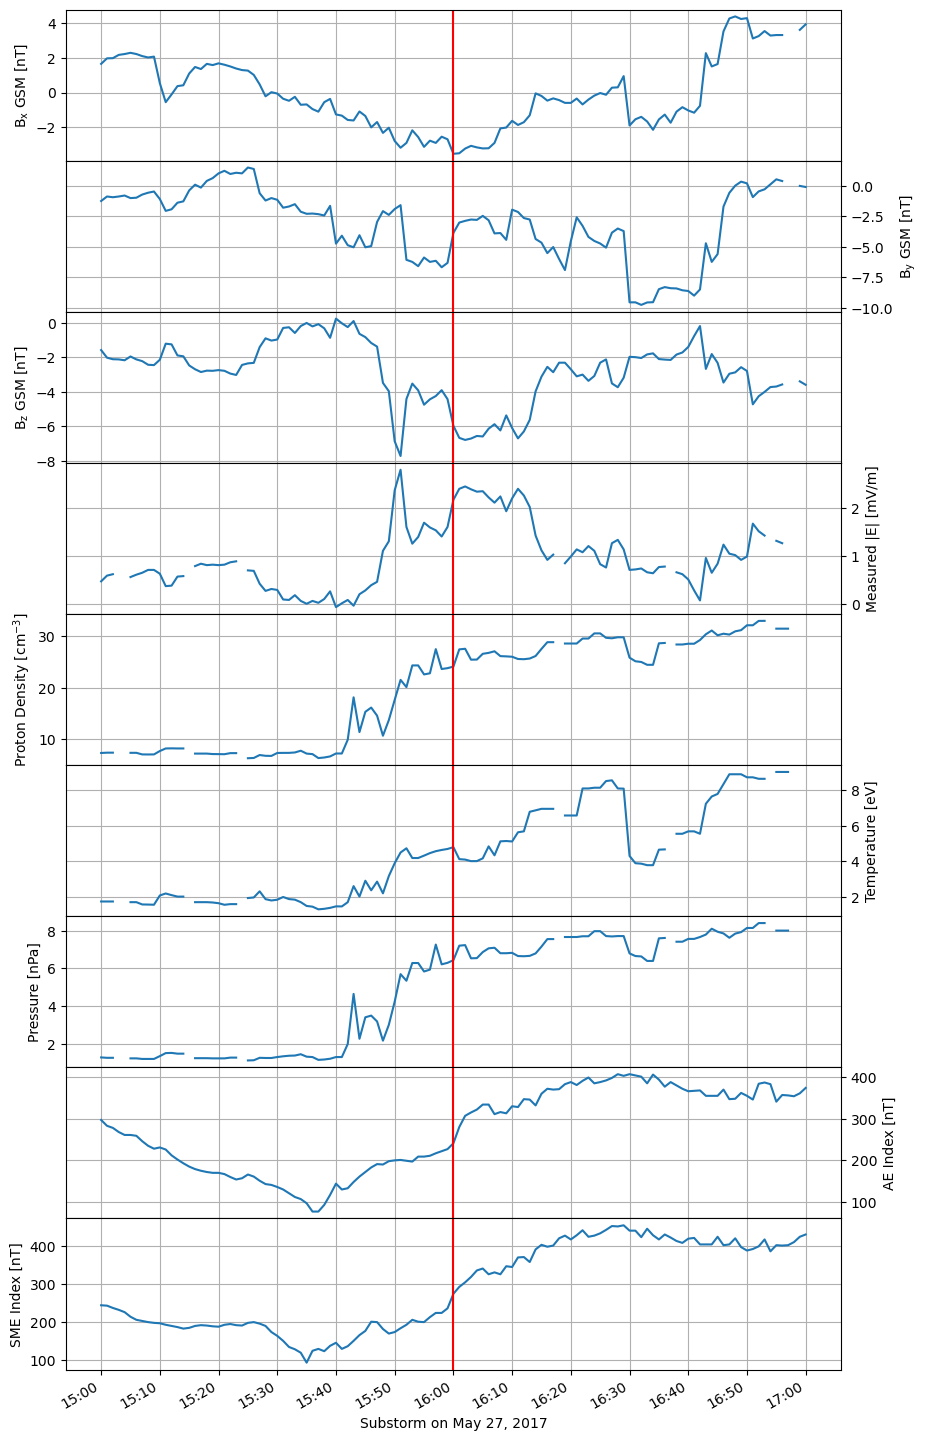

In [24]:
# Input the exact time of the substorm you're looking for, refer to the Newell list for exact substorm times, use either the Newell list or any list, can be any time after January, 1995
subtimevalue=time_double('2017-05-27 16:00:00')
# Choose the time range to look at:
timerange=['2017-05-27 15:00:00','2017-05-27 17:00:00']
# For the label on the plot:
datelabel='Substorm on May 27, 2017'
# Change the value for nbins depending on how many x axis ticks you want
numbins=13

subindex=bxtimes.searchsorted(subtrange) # Finds the index of each starting time. This is such a neat trick that should be documented more on, greatly reduces calculation time
epochtime=time_double(timerange)
timesize=(epochtime[1]-epochtime[0])/60
timesize=np.array(timesize)
timesize=timesize.astype('int')
propertimerange=np.linspace(epochtime[0],epochtime[1],timesize+1)
timeindex=bxtimes.searchsorted(propertimerange)
timerangeint=pd.period_range(start=timerange[0],end=timerange[1],freq='min')
smetimesint=pd.period_range(smetimes[0],smetimes.iloc[-1],freq='min')
smeindex=smetimesint.searchsorted(timerangeint) # This is a confusing name, but it is the index of all SME values associated with the time range we chose

fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9)=plt.subplots(nrows=9,sharex=True,subplot_kw=dict(frameon=True),figsize=(10,20))
plt.subplots_adjust(hspace=.0)
ax1.grid(),ax2.grid(),ax3.grid(),ax4.grid(),ax5.grid(),ax6.grid(),ax7.grid(),ax8.grid(),ax9.grid()
ax1.plot(bxtimes[timeindex],bxvalues[timeindex])
ax2.plot(bxtimes[timeindex],bygsmvalues[timeindex])
ax3.plot(bxtimes[timeindex],bzgsmvalues[timeindex])
ax4.plot(bxtimes[timeindex],efieldmeasuredvalues[timeindex])
ax5.plot(bxtimes[timeindex],protondenvalues[timeindex])
ax6.plot(bxtimes[timeindex],temperaturevalues[timeindex])
ax7.plot(bxtimes[timeindex],flowpressurevalues[timeindex])
ax8.plot(bxtimes[timeindex],aeindexvalues[timeindex])
smevalues=np.array(smevalues)
ax9.plot(bxtimes[timeindex],smevalues[smeindex])
ax1.axvline(x=subtimevalue,color='r')
ax2.axvline(x=subtimevalue,color='r')
ax3.axvline(x=subtimevalue,color='r')
ax4.axvline(x=subtimevalue,color='r')
ax5.axvline(x=subtimevalue,color='r')
ax6.axvline(x=subtimevalue,color='r')
ax7.axvline(x=subtimevalue,color='r')
ax8.axvline(x=subtimevalue,color='r')
ax9.axvline(x=subtimevalue,color='r')
ax1.set_ylabel('$\mathrm{B_x}$ GSM [nT]')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_ylabel('$\mathrm{B_y}$ GSM [nT]')
ax3.set_ylabel('$\mathrm{B_z}$ GSM [nT]')
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.set_ylabel('Measured |E| [mV/m]')
ax5.set_ylabel('Proton Density [$\mathrm{cm^{-3}}$]')
ax6.yaxis.set_label_position("right")
ax6.yaxis.tick_right()
ax6.set_ylabel('Temperature [eV]')
ax7.set_ylabel('Pressure [nPa]')
ax8.yaxis.set_label_position("right")
ax8.yaxis.tick_right()
ax8.set_ylabel('AE Index [nT]')
ax9.set_ylabel('SME Index [nT]')
ax9.set_xlabel(datelabel)
plt.gcf().autofmt_xdate()
bxtimes=bxtimes.astype('float')
plt.gca().xaxis.set_major_locator(mtick.FixedLocator(bxtimes[timeindex]))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda pos,_: time.strftime("%H:%M",time.gmtime(pos))))
plt.locator_params(axis='x',nbins=numbins)
plt.savefig(datadirectory+'examplesubstormplot.png',dpi=1000)